# 1. Install Dependencies and Setup

In [17]:
!pip install tensorflow tensorflow opencv-python matplotlib

In [18]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext_assistant                    0.4.0
aext_assistant_server             0.4.0
aext_core                         0.4.0
aext_core_server                  0.4.0
aext_shared                       0.4.0
aiobotocore                       2.7.0
aiofiles                          22.1.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
aiosqlite                         0.18.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                  

In [19]:
import tensorflow as tf
import os

In [20]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [21]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [94]:
import cv2
import imghdr

In [95]:
data_dir = 'data' 

In [96]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [97]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [98]:
import numpy as np
from matplotlib import pyplot as plt

In [99]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 354 files belonging to 2 classes.


In [152]:
data1 = tf.keras.utils.image_dataset_from_directory('data')

Found 354 files belonging to 2 classes.


In [153]:
data_iterator = data.as_numpy_iterator()

In [154]:
batch = data_iterator.next()

Descriptive Statistics

In [149]:
import pandas as pd

# Initialize an empty list to store image dimensions
image_dimensions = []

# Iterate over all batches in the dataset
for images, _ in data:
    # Iterate over images in the current batch
    for image in images:
        # Append the dimensions of the current image to the list
        image_dimensions.append((image.shape[0], image.shape[1]))

# Convert to DataFrame for summary statistics
dimensions_df = pd.DataFrame(image_dimensions, columns=['Height', 'Width'])

# Obtain summary statistics
summary_statistics = dimensions_df.describe()

# Display summary statistics
print(summary_statistics)


       Height  Width
count   354.0  354.0
mean    256.0  256.0
std       0.0    0.0
min     256.0  256.0
25%     256.0  256.0
50%     256.0  256.0
75%     256.0  256.0
max     256.0  256.0


Data Visualization

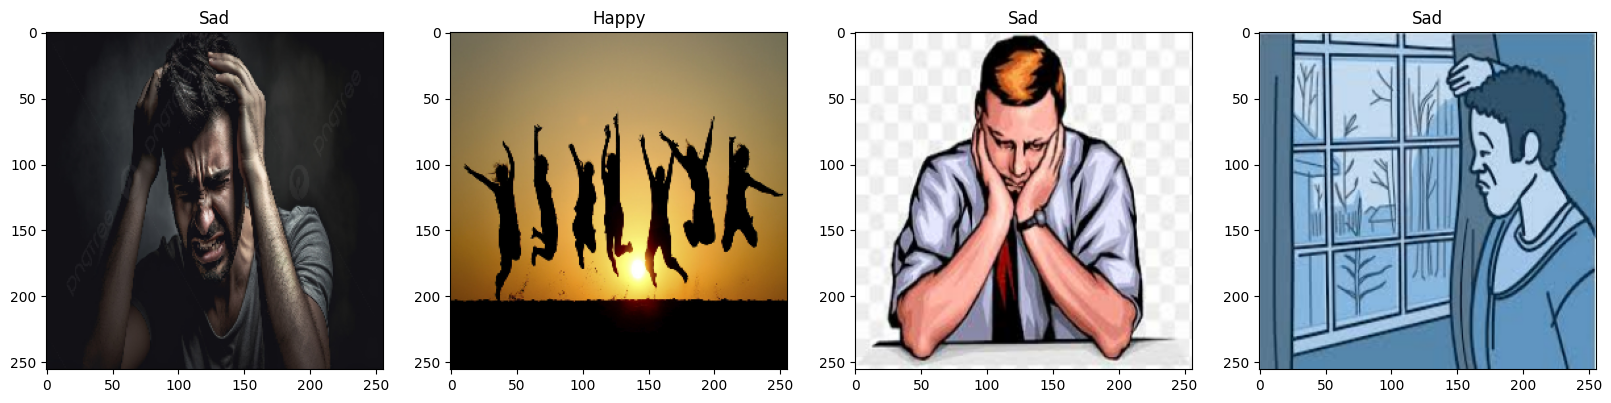

In [102]:
import numpy as np
from matplotlib import pyplot as plt

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Define a dictionary to map original labels to replacements
label_map = {0: 'Happy', 1: 'Sad'}

# Plot images with modified labels
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, (img, label) in enumerate(zip(batch[0][:4], batch[1][:4])):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(label_map[label])  # Set the title using the mapped label

plt.show()


histogram (representing the distribution of pixel intensity values across the images belonging to that class. This helps in understanding how pixel intensities are distributed within each class and if there are any noticeable differences or similarities between the classes.)

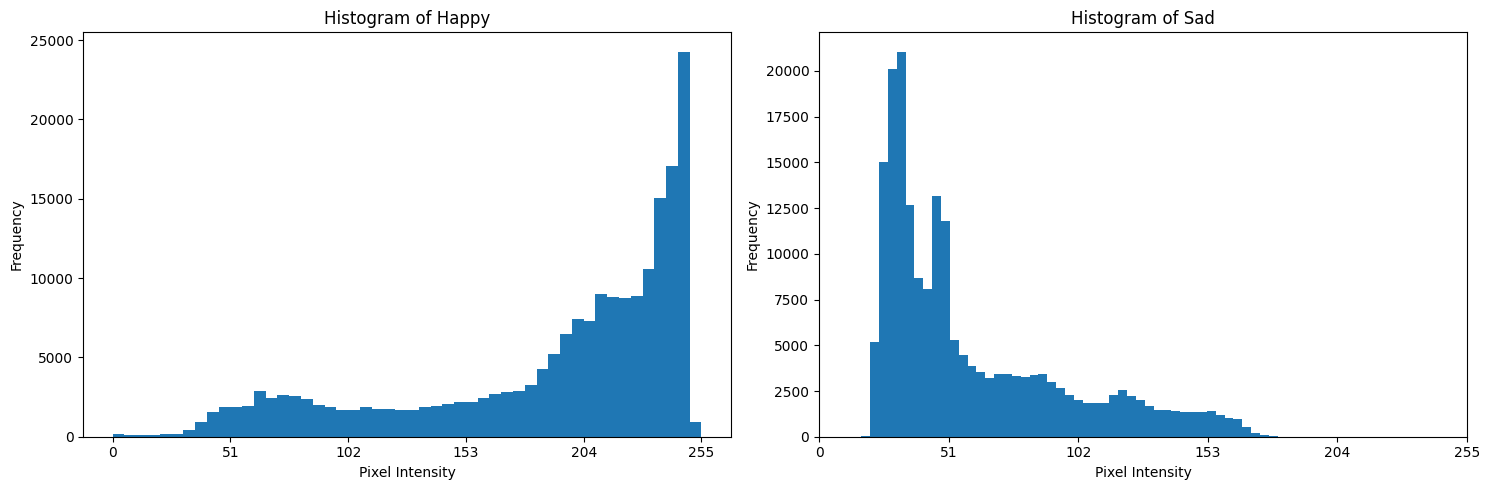

In [155]:
import numpy as np
from matplotlib import pyplot as plt

data_iterator1 = data1.as_numpy_iterator()
batch = data_iterator1.next()

# Plot histograms of pixel intensity values for each class
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))  # Adjust ncols to 2 for two classes

class_labels = ['Happy', 'Sad']  # Define class labels

for class_idx in range(2):  # Iterate over the range [0, 1] for two classes
    # Get indices of images belonging to the current class
    class_indices = np.where(batch[1] == class_idx)[0]
    # Check if there are images belonging to the current class
    if len(class_indices) > 0:
        # Randomly select one image from the current class
        img_idx = np.random.choice(class_indices)
        # Plot histogram for the selected image
        axs[class_idx].hist(batch[0][img_idx].ravel(), bins=50)
        axs[class_idx].set_title(f'Histogram of {class_labels[class_idx]}')
        axs[class_idx].set_xlabel('Pixel Intensity')
        axs[class_idx].set_ylabel('Frequency')
        # Set x-axis ticks and labels
        axs[class_idx].set_xticks(np.linspace(0, 255, 6))  # Set ticks at specific intervals
        axs[class_idx].set_xticklabels([f'{i:.0f}' for i in np.linspace(0, 255, 6)])  # Set corresponding labels
    else:
        axs[class_idx].set_title(f'Class {class_labels[class_idx]} (No Samples)')
        axs[class_idx].axis('off')  # Hide axes for empty plots

plt.tight_layout()
plt.show()


Barchart for no. of images in each class:

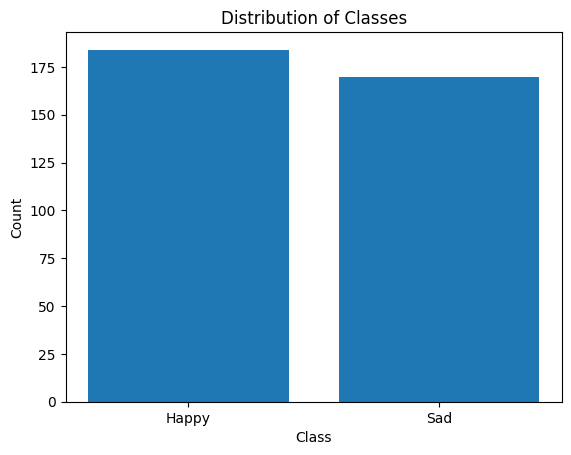

In [151]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

labels = np.concatenate([y for x, y in data], axis=0)

# Count the occurrences of each class label
class_counts = Counter(labels)

# Extract class labels and their corresponding counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Specify the class labels for the x-axis ticks
class_labels = ['Happy', 'Sad']

# Plot bar chart with custom x-axis tick labels
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')

# Set custom x-axis tick labels
plt.xticks(classes, class_labels)

plt.show()


# 4. Scale Data

In [103]:
data = data.map(lambda x,y: (x/255, y))

In [104]:
data.as_numpy_iterator().next()

(array([[[[0.95686275, 0.95686275, 0.95686275],
          [0.95686275, 0.95686275, 0.95686275],
          [0.95686275, 0.95686275, 0.95686275],
          ...,
          [0.99215686, 0.99607843, 0.9764706 ],
          [0.99215686, 0.99607843, 0.9764706 ],
          [0.99215686, 0.99607843, 0.9764706 ]],
 
         [[0.95686275, 0.95686275, 0.95686275],
          [0.95686275, 0.95686275, 0.95686275],
          [0.95686275, 0.95686275, 0.95686275],
          ...,
          [0.99215686, 0.99607843, 0.9764706 ],
          [0.99215686, 0.99607843, 0.9764706 ],
          [0.99215686, 0.99607843, 0.9764706 ]],
 
         [[0.95686275, 0.95686275, 0.95686275],
          [0.95686275, 0.95686275, 0.95686275],
          [0.95686275, 0.95686275, 0.95686275],
          ...,
          [0.99215686, 0.99607843, 0.9764706 ],
          [0.99215686, 0.99607843, 0.9764706 ],
          [0.99215686, 0.99607843, 0.9764706 ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [105]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [106]:
train_size

8

In [107]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [108]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [110]:
model = Sequential()

In [111]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))  # Removed the '1' argument
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))  # Removed the '1' argument
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))  # Removed the '1' argument
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [112]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [114]:
logdir='logs'

In [115]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [117]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.9986 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 9.7823e-04
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_l

# 8. Plot Performance

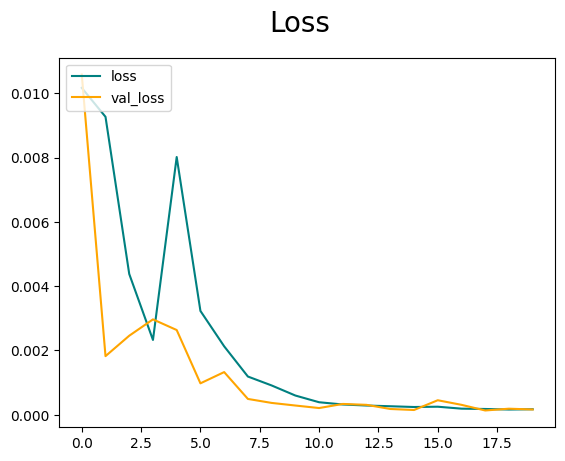

In [118]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

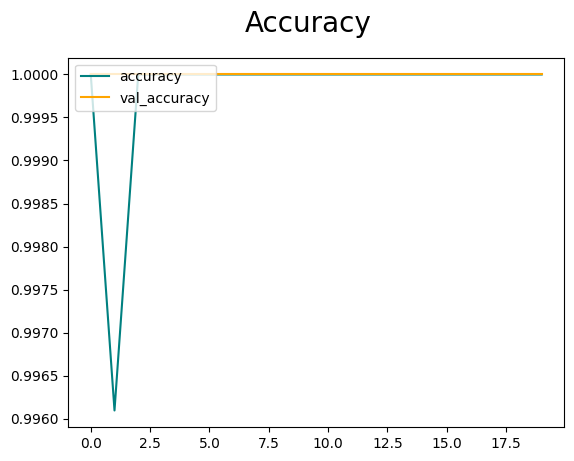

In [119]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [120]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [121]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [122]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [123]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [124]:
import cv2

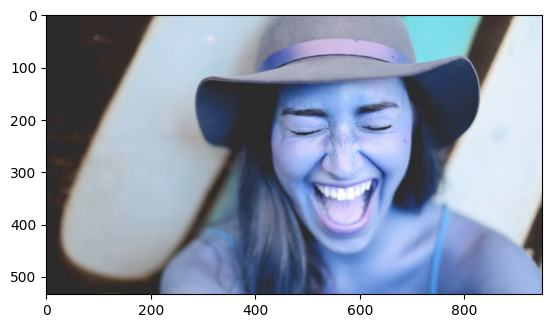

In [140]:
img = cv2.imread(r"C:\Users\dauuv\ImageClassification\data\happy\Happy_Woman_Etel_Leit.jpg")
plt.imshow(img)
plt.show()

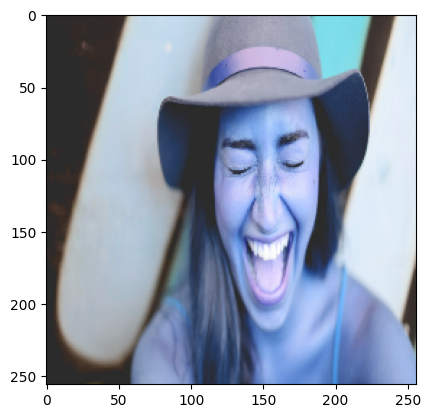

In [141]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [142]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [143]:
yhat

array([[0.00640572]], dtype=float32)

In [144]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [156]:
from tensorflow.keras.models import load_model

In [157]:
# Save the model in the native Keras format
model.save('expression_classifier.keras')  # This avoids the warning

In [158]:
new_model = load_model('expression_classifier.keras')

In [159]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[0.00640572]], dtype=float32)

In [236]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming you have a trained classification model named 'model'

# Make predictions on the test data
predictions = model.predict(test.map(lambda x, y: x))  # Predictions

# Convert predictions to binary labels (0 or 1) based on a threshold (e.g., 0.5 for sigmoid output)
binary_predictions = (predictions > 0.5).astype(int)

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test dataset to extract true labels
for _, labels_batch in test:
    true_labels.extend(labels_batch.numpy())

# Iterate over the binary predictions to extract predicted labels
predicted_labels.extend(binary_predictions.flatten())

# Generate classification report
report = classification_report(true_labels, predicted_labels)

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate Precision
precision = precision_score(true_labels, predicted_labels)

# Calculate Recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels)

print("Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
Classification Metrics:
Accuracy: 0.6875
Precision: 0.7857142857142857
Recall: 0.6111111111111112
F1 Score: 0.6875
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        14
           1       0.79      0.61      0.69        18

    accuracy                           0.69        32
   macro avg       0.70      0.70      0.69        32
weighted avg       0.71      0.69      0.69        32



In [217]:
# Calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[14  3]
[ 2 12]
